
### 1. Melt
**Definition:**
The `melt` function in Pandas is used to transform a DataFrame from a wide format to a long format. This can be particularly useful in algorithmic trading for normalizing data, making it easier to perform time-series analysis or feed it into machine learning models.

**Use Cases in Algorithmic Trading:**
- **Normalizing OHLCV Data:** When you have OHLCV (Open, High, Low, Close, Volume) data for multiple assets, `melt` can help consolidate this data into a long format, making it easier to analyze or visualize.
- **Preparing Data for Machine Learning:** Converting wide-format feature data into a long format suitable for training machine learning models.

**Example:**
```python
import pandas as pd

# Sample OHLCV data for multiple assets
df = pd.DataFrame({
    'Date': ['2024-06-20', '2024-06-21', '2024-06-20', '2024-06-21'],
    'Asset': ['AAPL', 'AAPL', 'GOOG', 'GOOG'],
    'Open': [145.3, 146.5, 2735.1, 2745.3],
    'Close': [146.2, 147.8, 2740.0, 2750.5]
})

# Melting the data to long format
melted_df = pd.melt(df, id_vars=['Date', 'Asset'], value_vars=['Open', 'Close'], var_name='Metric', value_name='Value')
print(melted_df)
```

### 2. Pivot Table
**Definition:**
A `pivot_table` in Pandas is a powerful data summarization tool. It allows you to aggregate and transform data by changing (pivoting) the structure of a DataFrame.

**Use Cases in Algorithmic Trading:**
- **Aggregating Trading Data:** Summarizing trading data such as average daily returns, volumes, or other metrics across different time frames or assets.
- **Creating Contingency Tables:** For analyzing the frequency of trading signals or market conditions.

**Example:**
```python
import pandas as pd

# Sample trading data
df = pd.DataFrame({
    'Date': ['2024-06-20', '2024-06-21', '2024-06-20', '2024-06-21'],
    'Asset': ['AAPL', 'AAPL', 'GOOG', 'GOOG'],
    'Volume': [1000, 1500, 1200, 1600],
    'Price Change': [1.2, -0.5, 2.3, 1.0]
})

# Creating a pivot table to summarize average volume and price change by asset
pivot_df = pd.pivot_table(df, values=['Volume', 'Price Change'], index=['Asset'], aggfunc={'Volume': 'mean', 'Price Change': 'mean'})
print(pivot_df)
```






### Long Vs Wide Data
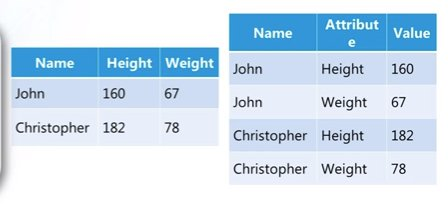

**Wide format** is where we have a single row for every data point with multiple columns to hold the values of various attributes.

**Long format** is where, for each data point we have as many rows as the number of attributes and each row contains the value of a particular attribute for a given data point.

In [ ]:
# melt -> simple example Ticker
# wide to long
pd.DataFrame({'AAPL':[100]}).melt()

In [ ]:
# melt -> Ticker with Price
pd.DataFrame({'AAPL':[100],'BTC':[2000],'MSFT':3000})

In [ ]:
# melt -> Ticker with Price
pd.DataFrame({'AAPL':[100],'BTC':[2000],'MSFT':3000}).melt(var_name = 'Ticker',value_name = 'Price')

In [ ]:
# melt -> Ticker with Price
pd.DataFrame({
    
    'Tickers':['AAPL','BTC','MSFT','META'],
    'Price':['100','200','300','400'],
    'Year':['2020','2021','2022','2023'],
    'Close':['110','220','320','420']
    
    })

In [ ]:
# melt -> Ticker with Price
pd.DataFrame({
    
    'Tickers':['AAPL','BTC','MSFT','META'],
    'Price':['100','200','300','400'],
    'Year':['2020','2021','2022','2023'],
    'Close':['110','220','320','420']
    
    }).melt(id_vars =['Tickers'],var_name ='Price',value_name = 'Value')

In [ ]:
# melt -> real world example

import pandas as pd
import yfinance as yf

data =  yf.download(tickers=['AAPL','AMZN','MSFT','META'], start= '2024-01-01', end= '2024-06-30',group_by= 'Ticker')
data = data.stack(level=0, future_stack=True).reset_index(level=1)
data.reset_index().melt(id_vars=['Date','Ticker'], var_name = 'Metrics', value_name = 'Value',value_vars = ['Open',	'High',	'Low',	'Close',	'Adj Close',	'Volume'])

### Pivot Table

The pivot table takes simple column-wise data as input, and groups the entries into a two-dimensional table that provides a multidimensional summarization of the data.

In [ ]:
import numpy as np
import pandas as pd
data

In [ ]:
#Dataset  Real world
data.groupby(['Ticker','Date'])['Open'].mean().unstack()


In [ ]:
data.pivot_table(index='Ticker',columns='Date',values='Open')

In [ ]:
# aggfunc
data.pivot_table(index='Ticker',columns='Date',values='Open',aggfunc='mean')

In [ ]:
# all cols together
data.pivot_table(index='Ticker',columns='Date',aggfunc={'Open':'mean','High':'max',"Close":'min',"Volume":'sum'})

In [ ]:
# multidimensional
data.pivot_table(index=['Ticker','Date'],columns='Date',aggfunc={'Open':'mean','High':'max',"Close":'min',"Volume":'sum'})

In [140]:
# margins
data.pivot_table(index=['Ticker'],columns='Volume',aggfunc='sum',margins=True)

Price    Adj Close                                                             \
Volume     7088700     8117000     8380600     9226200    9247000     9380700   
Ticker                                                                          
AAPL           NaN         NaN         NaN         NaN        NaN         NaN   
AMZN           NaN         NaN         NaN         NaN        NaN         NaN   
META    476.516876  509.074554  502.521057  473.889465  490.86264  492.471039   
MSFT           NaN         NaN         NaN         NaN        NaN         NaN   
All     476.516876  509.074554  502.521057  473.889465  490.86264  492.471039   

Price                                                   ...        Open  \
Volume     9437700     9673700     9712500     9847900  ...   102518000   
Ticker                                                  ...               
AAPL           NaN         NaN         NaN         NaN  ...  179.860001   
AMZN           NaN         NaN         NaN         NaN  ...         NaN   
META    474.948456  506.966644  507.256378  499.264313  ...         NaN   
MSFT           NaN         NaN         NaN         NaN  ...         NaN   
All     474.948456  506.966644  507.256378  499.264313  ...  179.860001   

Price                                                               \
Volume   106181300   117154900   121664700   136682600   163224100   
Ticker                                                               
AAPL    177.050003         NaN  171.169998  181.270004  186.649994   
AMZN           NaN  169.190002         NaN         NaN         NaN   
META           NaN         NaN         NaN         NaN         NaN   
MSFT           NaN         NaN         NaN         NaN         NaN   
All     177.050003  169.190002  171.169998  181.270004  186.649994   

Price                                                      
Volume   172373300   198134300   241805100            All  
Ticker                                                     
AAPL    193.649994  207.369995  210.389999   21777.799927  
AMZN           NaN         NaN         NaN   20786.210022  
META           NaN         NaN         NaN   55218.799988  
MSFT           NaN         NaN         NaN   49032.569977  
All     193.649994  207.369995  210.389999  146815.379913  

[5 rows x 2385 columns]

<Axes: xlabel='Ticker'>

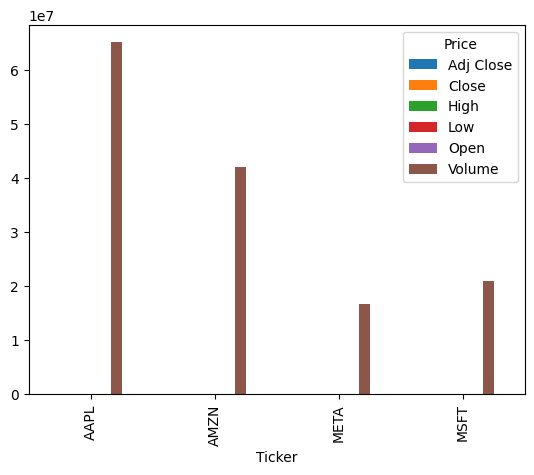

In [144]:
# plotting graphs
data.pivot_table(index='Ticker',).plot(kind='bar')

<Axes: xlabel='Date'>

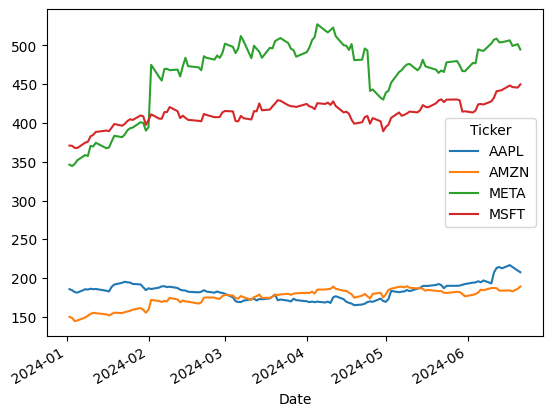

In [151]:
data.pivot_table(index='Date',columns='Ticker',values='Close').plot()